In [ ]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense
from keras.datasets import cifar100
import cv2

In [ ]:
model = keras.datasets.cifar100
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 4s 0us/step


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#đưa toàn bộ giá trị điểm ảnh về khoảng 0 -> 1.
x=x_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
from tensorflow.keras.utils import to_categorical
from keras import metrics
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [ ]:
from keras.models import Sequential
model = Sequential()

In [ ]:
#tao lop
model.add(Dense(512,activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               5

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 50, validation_split = 0.2)

Epoch 1/50
313/313 [==============================] - 19s 56ms/step - loss: 0.0099 - acc: 0.0325 - val_loss: 0.0098 - val_acc: 0.0549
Epoch 2/50
313/313 [==============================] - 13s 41ms/step - loss: 0.0098 - acc: 0.0466 - val_loss: 0.0098 - val_acc: 0.0584
Epoch 3/50
313/313 [==============================] - 13s 41ms/step - loss: 0.0097 - acc: 0.0585 - val_loss: 0.0097 - val_acc: 0.0670
Epoch 4/50
313/313 [==============================] - 13s 41ms/step - loss: 0.0097 - acc: 0.0640 - val_loss: 0.0097 - val_acc: 0.0751
Epoch 5/50
313/313 [==============================] - 13s 41ms/step - loss: 0.0097 - acc: 0.0773 - val_loss: 0.0096 - val_acc: 0.0898
Epoch 6/50
313/313 [==============================] - 13s 40ms/step - loss: 0.0096 - acc: 0.0825 - val_loss: 0.0096 - val_acc: 0.1076
Epoch 7/50
313/313 [==============================] - 13s 40ms/step - loss: 0.0096 - acc: 0.0894 - val_loss: 0.0095 - val_acc: 0.1171
Epoch 8/50
313/313 [==============================] - 13s 42ms

In [ ]:
model.save('Cifar100.h5')
from keras.models import load_model
model5 = load_model('Cifar100.h5')

In [ ]:
#danh gia mo hinh tren tap test
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0092 - acc: 0.1723


[0.009218242950737476, 0.17229999601840973]

313/313 [==============================] - 2s 6ms/step - loss: 0.0092 - acc: 0.1723
Test loss =  0.009218242950737476
Test acuracy 0.17229999601840973


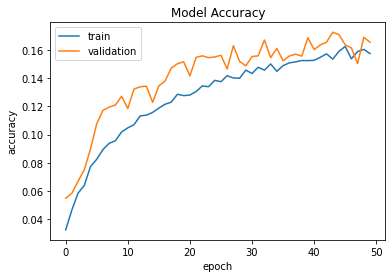

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss = ',score[0])
print('Test acuracy',score[1])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc ='upper left')

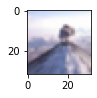

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


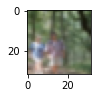

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


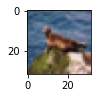

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


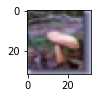

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


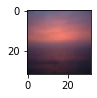

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


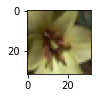

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


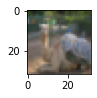

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


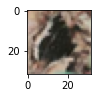

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


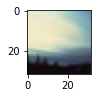

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
import numpy as np
Y_pred = model.predict(x_test)
for i in range(9):
  plt.subplot(330 +i+1)
  plt.imshow(x[i])
  plt.show()
  print(np.round(Y_pred[i]))

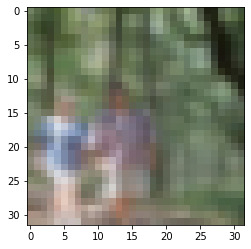

In [ ]:
plt.imshow(x[1])

In [ ]:
#output cua mo hinh co phan phoi xac suat cua cac nhan
predict_result = model.predict(np.array([x_test[1]]))
print(predict_result)

[[7.33403940e-05 8.16784275e-04 1.86710851e-03 7.29835406e-03
  3.89922261e-02 3.09040444e-03 8.72932188e-03 9.37279873e-03
  1.23115703e-02 2.32094224e-03 1.05854124e-03 3.31158168e-03
  6.09100214e-04 1.65159558e-03 9.52523015e-03 1.07425982e-02
  1.36864767e-03 3.26912705e-04 2.77266465e-02 1.14266071e-02
  8.46108946e-04 2.57629040e-03 2.53864261e-03 3.17336409e-04
  2.65878276e-03 3.01733310e-03 6.74256915e-03 2.94694379e-02
  2.74193101e-03 4.58473573e-03 1.62590470e-03 1.92534663e-02
  2.78334878e-03 3.06798723e-02 1.83804538e-02 2.13986519e-03
  9.23552667e-04 1.62805745e-03 7.31899887e-02 3.80309648e-03
  2.29294877e-03 8.22793879e-03 4.49951589e-02 1.92532763e-02
  2.98150759e-02 8.99312925e-03 2.41479836e-03 2.44268711e-04
  3.32989544e-03 3.13576784e-05 2.35123727e-02 1.39759546e-02
  5.75396807e-05 3.27653979e-05 7.04242673e-04 1.92732979e-02
  2.17006286e-03 1.47264916e-03 4.66969010e-04 1.44975143e-03
  5.51790727e-05 1.39469840e-03 3.51086055e-04 1.50746405e-02
  1.4040

In [ ]:
#nhan co gia tri xac saut cao nhat
np.argmax(predict_result)

74